<a href="https://colab.research.google.com/github/Marchbreeze/Edu-Public-Data/blob/main/everypap_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd

df = pd.read_csv('paps_highschool_2024.csv')
df

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,9.1,9.0,40.9,10.0,45.5,1.0,4.5,0.0,0.0,22.0
1,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,3.2,66.0,52.8,46.0,36.8,9.0,7.2,0.0,0.0,125.0
2,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,0.0,8.0,33.3,13.0,54.2,3.0,12.5,0.0,0.0,24.0
3,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,1.7,42.0,35.6,60.0,50.8,14.0,11.9,0.0,0.0,118.0
4,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,3학년,...,0.0,7.0,22.6,11.0,35.5,8.0,25.8,5.0,16.1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11570,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,1학년,...,6.7,19.0,31.7,28.0,46.7,9.0,15.0,0.0,0.0,60.0
11571,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,0.0,4.0,16.0,13.0,52.0,7.0,28.0,1.0,4.0,25.0
11572,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,0.0,30.0,44.1,32.0,47.1,6.0,8.8,0.0,0.0,68.0
11573,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,3학년,...,3.6,13.0,46.4,11.0,39.3,2.0,7.1,1.0,3.6,28.0


In [56]:
# column명 확인
df.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '학년', '성별', '왕복오래달리기(회)', '오래달리기걷기(초)', '스텝검사(PEI)',
       '앉아윗몸앞으로굽히기(cm)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)', '윗몸말아올리기(회)', '악력(kg)',
       '50m달리기(초)', '제자리멀리뛰기(cm)', 'BMI(kg/㎡)', '체지방률(%fat)', '인원', '%',
       '인원.1', '%.1', '인원.2', '%.2', '인원.3', '%.3', '인원.4', '%.4', '검사인원수'],
      dtype='object')

## 시도 1. 전체 합계로 활용

In [57]:
# 상관관계 확인을 위한 데이터 전처리
columns_of_interest = ['왕복오래달리기(회)', '오래달리기걷기(초)', '스텝검사(PEI)',
                       '앉아윗몸앞으로굽히기(cm)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)',
                       '윗몸말아올리기(회)', '악력(kg)', '50m달리기(초)', '제자리멀리뛰기(cm)']
df['합계'] = df[columns_of_interest].sum(axis=1)
df_new = df[['합계', 'BMI(kg/㎡)']]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


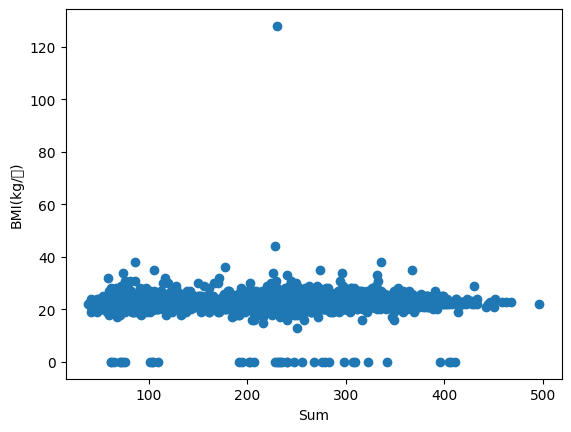

In [58]:
# 데이터 시각화
import matplotlib.pyplot as plt

x = df_new['합계']
y = df_new['BMI(kg/㎡)']

plt.scatter(x, y)
plt.xlabel('Sum')
plt.ylabel('BMI(kg/㎡)')
plt.show()

In [59]:
# 상관관계 표시
correlation = df_new.corr(method = 'kendall')
correlation

,합계,BMI(kg/㎡)
합계,1.00000,0.15786
BMI(kg/㎡),0.15786,1.00000


## 시도 2. 이상치 제거 후 활용

In [60]:
df_new = df_new[(df_new['BMI(kg/㎡)'] >= 15) & (df_new['BMI(kg/㎡)'] <= 35)]
df_new

,합계,BMI(kg/㎡)
0,336.0,22.0
1,242.0,20.0
2,325.0,23.0
3,227.0,21.0
4,290.0,24.0
...,...,...
11570,220.0,22.0
11571,307.0,24.0
11572,240.0,23.0
11573,343.0,22.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


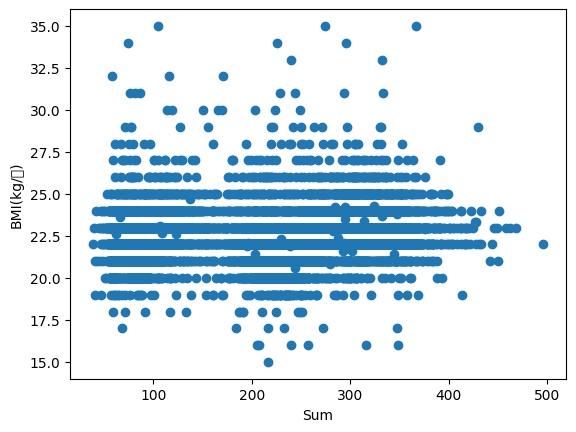

In [61]:
# 데이터 시각화
x = df_new['합계']
y = df_new['BMI(kg/㎡)']

plt.scatter(x, y)
plt.xlabel('Sum')
plt.ylabel('BMI(kg/㎡)')
plt.show()

In [62]:
# 상관관계 표시
correlation = df_new.corr(method = 'kendall')
correlation

,합계,BMI(kg/㎡)
합계,1.000000,0.159071
BMI(kg/㎡),0.159071,1.000000


## 시도 3. 각 평균의 백분위로 활용

In [63]:
import numpy as np

# 각 row에 대해 0인 데이터를 제외하고 백분위로 변환
def convert_to_percentiles(row):
    filtered_row = row[row > 0]
    percentiles = 100 * (filtered_row.rank(method='min') - 1) / (len(filtered_row) - 1)
    return percentiles.round(2)

# BMI 필터링 적용 (BMI는 백분위 변환에서 제외해야 하므로 원래 데이터프레임에서 필터링)
df_filtered = df[(df['BMI(kg/㎡)'] >= 15) & (df['BMI(kg/㎡)'] <= 35)]

# DataFrame에서 숫자형 데이터만 포함하는 열을 선택해 적용
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('학교급코드')

# 선택된 숫자형 열에 대해서만 apply 함수를 사용하여 각 행에 대해 백분위 변환 함수 적용
df_percent = df_filtered[numeric_columns].apply(convert_to_percentiles, axis=1)

# 백분위로 변환된 데이터를 원래 DataFrame에 병합
df_filtered[numeric_columns] = df_percent
df_filtered

<ipython-input-63-82ec94e80d82>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numeric_columns] = df_percent


,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수,합계
0,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,NaN,7.14,21.43,35.71,0.00,NaN,92.86,NaN,NaN,100.0
1,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,NaN,7.14,78.57,64.29,21.43,NaN,92.86,NaN,NaN,100.0
2,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,NaN,NaN,8.33,33.33,0.00,NaN,91.67,NaN,NaN,100.0
3,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,NaN,7.14,64.29,78.57,21.43,NaN,92.86,NaN,NaN,100.0
4,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,3학년,...,NaN,NaN,7.14,21.43,14.29,0.0,92.86,NaN,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11570,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,1학년,...,NaN,0.00,35.71,57.14,14.29,NaN,92.86,NaN,NaN,100.0
11571,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,NaN,NaN,7.14,35.71,21.43,0.0,92.86,NaN,NaN,100.0
11572,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,NaN,NaN,41.67,50.00,0.00,NaN,91.67,NaN,NaN,100.0
11573,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,3학년,...,NaN,0.00,43.75,37.50,12.50,0.0,93.75,NaN,NaN,100.0


In [79]:
# 0이 아닌 백분위 값에 대해서 평균 행 추가
columns_of_interest = ['왕복오래달리기(회)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)',
                       '윗몸말아올리기(회)', '50m달리기(초)', '제자리멀리뛰기(cm)']

df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)
df_result = df_filtered[['평균', 'BMI(kg/㎡)']]
df_result

<ipython-input-79-b2b557cd4dd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)


,평균,BMI(kg/㎡)
0,39.285000,64.29
1,85.710000,42.86
2,50.000000,66.67
3,85.710000,42.86
4,50.000000,78.57
...,...,...
11570,46.425000,50.00
11571,32.140000,71.43
11572,83.330000,33.33
11573,33.333333,75.00


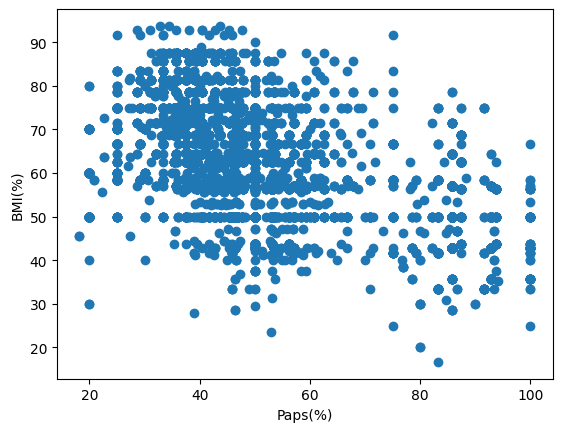

In [80]:
# 데이터 시각화
x = df_result['평균']
y = df_result['BMI(kg/㎡)']

plt.scatter(x, y)
plt.xlabel('Paps(%)')
plt.ylabel('BMI(%)')
plt.show()

In [81]:
# 상관관계 표시
correlation = df_result.corr(method = 'spearman')
correlation

,평균,BMI(kg/㎡)
평균,1.000000,-0.543166
BMI(kg/㎡),-0.543166,1.000000
